<h1 align="center"><u>Bank Direct Marketing</u></h1>

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn as sns
from IPython.display import display, HTML

### Reading the dataset

In [2]:
df = pd.read_csv('data/train.csv')
df

,RecordID,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,13783,49,admin.,divorced,professional.course,no,yes,yes,cellular,aug,...,1,115,2,failure,1.4,92.479703,-35.498996,0.705058,4990.198481,no
1,23986,52,services,married,high.school,unknown,yes,no,cellular,may,...,1,402,2,nonexistent,-1.8,93.439161,-39.331320,4.245479,5144.563621,yes
2,20663,46,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,...,1,999,1,failure,-1.8,93.075000,-47.100000,1.445000,5099.100000,no
3,13958,26,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,...,28,999,0,nonexistent,1.4,93.444000,-36.100000,4.967000,5228.100000,yes
4,28184,47,admin.,single,university.degree,no,no,no,cellular,nov,...,1,252,4,success,-3.4,94.352376,-33.073620,1.208702,5025.420036,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,27619,33,admin.,married,high.school,no,no,no,cellular,aug,...,3,901,3,failure,-2.9,92.570527,-45.491308,3.533396,5177.336146,yes
22496,16444,34,admin.,divorced,high.school,no,unknown,unknown,cellular,aug,...,15,524,3,failure,1.4,92.809945,-27.601325,4.651084,5004.892544,no
22497,25076,27,admin.,married,professional.course,no,yes,no,cellular,may,...,1,757,5,success,-1.8,94.301672,-38.211994,4.092928,4994.439635,no
22498,4587,55,retired,married,high.school,no,yes,no,telephone,may,...,5,999,0,nonexistent,1.1,93.994000,-36.400000,4.857000,5191.000000,no


In [3]:
df_test = pd.read_csv('data/test.csv')
df_test

,RecordID,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,14664,37,technician,single,professional.course,no,yes,yes,cellular,aug,...,3309,1,471,0,success,1.4,92.325519,-33.010270,3.562675,5028.544435
1,25250,26,admin.,single,high.school,no,yes,no,cellular,may,...,2757,2,159,2,success,-1.8,92.591695,-46.129934,3.294182,5025.294022
2,4070,42,blue-collar,married,basic.6y,no,no,no,telephone,may,...,266,3,999,0,nonexistent,1.1,93.994000,-36.400000,4.857000,5191.000000
3,19446,38,blue-collar,married,basic.9y,no,yes,no,telephone,nov,...,29,1,433,5,success,-0.1,92.752588,-41.837090,3.318768,5111.327469
4,5111,43,blue-collar,married,basic.4y,no,yes,no,telephone,may,...,1684,2,938,3,success,1.1,93.983679,-35.267269,3.833161,5183.822823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,25105,50,admin.,unknown,university.degree,unknown,yes,yes,telephone,apr,...,3969,48,290,1,failure,-1.8,94.077494,-39.985944,3.709514,5033.480618
7496,13297,35,blue-collar,married,basic.4y,no,no,no,cellular,jul,...,596,8,424,3,failure,1.4,93.302019,-49.737088,1.766907,5095.562948
7497,26780,53,retired,single,basic.4y,no,yes,no,cellular,jun,...,107,3,999,0,nonexistent,-2.9,92.963000,-40.800000,1.281000,5076.200000
7498,16186,32,technician,married,professional.course,no,no,no,cellular,aug,...,172,3,999,0,nonexistent,1.4,93.444000,-36.100000,4.963000,5228.100000


### Feature Engineering

In [4]:
df.shape

(22500, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RecordID        22500 non-null  int64  
 1   age             22500 non-null  int64  
 2   job             22500 non-null  object 
 3   marital         22500 non-null  object 
 4   education       22500 non-null  object 
 5   default         22500 non-null  object 
 6   housing         22500 non-null  object 
 7   loan            22500 non-null  object 
 8   contact         22500 non-null  object 
 9   month           22500 non-null  object 
 10  day_of_week     22500 non-null  object 
 11  duration        22500 non-null  int64  
 12  campaign        22500 non-null  int64  
 13  pdays           22500 non-null  int64  
 14  previous        22500 non-null  int64  
 15  poutcome        22500 non-null  object 
 16  emp.var.rate    22500 non-null  float64
 17  cons.price.idx  22500 non-null 

In [6]:
df.isna().sum()

RecordID          0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribe         0
dtype: int64

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RecordID        7500 non-null   int64  
 1   age             7500 non-null   int64  
 2   job             7500 non-null   object 
 3   marital         7500 non-null   object 
 4   education       7500 non-null   object 
 5   default         7500 non-null   object 
 6   housing         7500 non-null   object 
 7   loan            7500 non-null   object 
 8   contact         7500 non-null   object 
 9   month           7500 non-null   object 
 10  day_of_week     7500 non-null   object 
 11  duration        7500 non-null   int64  
 12  campaign        7500 non-null   int64  
 13  pdays           7500 non-null   int64  
 14  previous        7500 non-null   int64  
 15  poutcome        7500 non-null   object 
 16  emp.var.rate    7500 non-null   float64
 17  cons.price.idx  7500 non-null   f

In [8]:
df.drop(columns=['RecordID'], axis=1, inplace=True)

In [9]:
def unknown_count(data):
    print("unknown counts\n")
    column_list = data.select_dtypes('O').columns.to_list()
    for i in column_list:
        for j in data[i].unique():
            if j == 'unknown':
                print(i,': ',data[i].value_counts()['unknown'])
                
    print("\nunknown in dataframe",)
    sns.heatmap((data.sort_values(by=['default'], ignore_index=True) == 'unknown'), cbar=False)
    plt.show()

unknown counts

job :  274
marital :  320
education :  994
default :  4860
housing :  886
loan :  889

unknown in dataframe


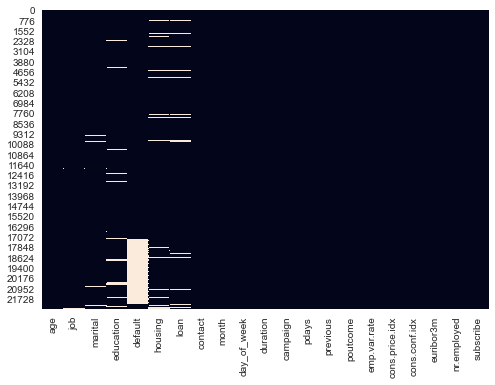

In [10]:
unknown_count(df)

unknown counts

job :  84
marital :  131
education :  336
default :  1597
housing :  300
loan :  306

unknown in dataframe


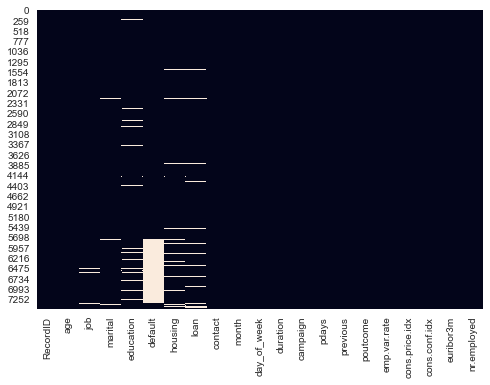

In [11]:
unknown_count(df_test)

In [12]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,49,admin.,divorced,professional.course,no,yes,yes,cellular,aug,mon,...,1,115,2,failure,1.4,92.479703,-35.498996,0.705058,4990.198481,no
1,52,services,married,high.school,unknown,yes,no,cellular,may,mon,...,1,402,2,nonexistent,-1.8,93.439161,-39.331320,4.245479,5144.563621,yes
2,46,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,wed,...,1,999,1,failure,-1.8,93.075000,-47.100000,1.445000,5099.100000,no
3,26,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,fri,...,28,999,0,nonexistent,1.4,93.444000,-36.100000,4.967000,5228.100000,yes
4,47,admin.,single,university.degree,no,no,no,cellular,nov,tue,...,1,252,4,success,-3.4,94.352376,-33.073620,1.208702,5025.420036,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,33,admin.,married,high.school,no,no,no,cellular,aug,fri,...,3,901,3,failure,-2.9,92.570527,-45.491308,3.533396,5177.336146,yes
22496,34,admin.,divorced,high.school,no,unknown,unknown,cellular,aug,fri,...,15,524,3,failure,1.4,92.809945,-27.601325,4.651084,5004.892544,no
22497,27,admin.,married,professional.course,no,yes,no,cellular,may,thu,...,1,757,5,success,-1.8,94.301672,-38.211994,4.092928,4994.439635,no
22498,55,retired,married,high.school,no,yes,no,telephone,may,tue,...,5,999,0,nonexistent,1.1,93.994000,-36.400000,4.857000,5191.000000,no


In [13]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
subscribe          object
dtype: object

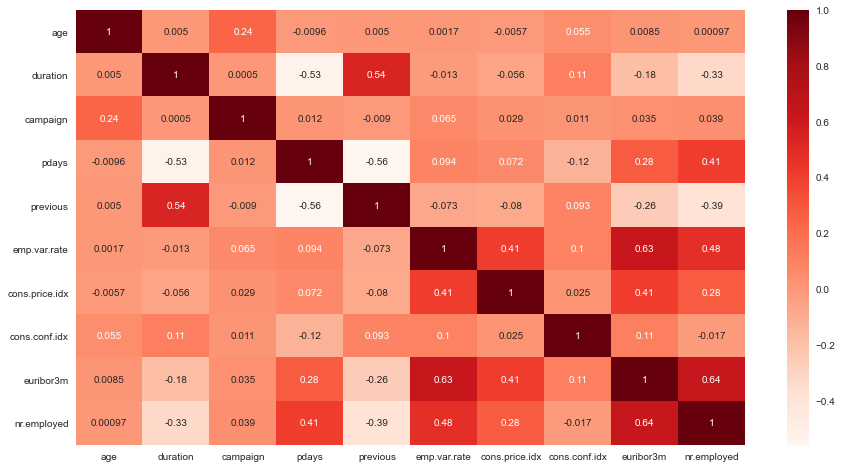

In [14]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap="Reds")
plt.show()

In [15]:
def compare_categories_in_column(df, column_name):
    # Title
    print(column_name)
    print("-"*len(column_name))
    
    # Table
    table = pd.DataFrame(df[column_name].value_counts().sort_values().reset_index())
    table.columns = [column_name+'_category', 'count']
    table.index += 1
    table['percentage'] = (table['count'] / table['count'].sum() * 100).round(2)
    display(table)

    # Plot
#     ax = sns.countplot(y=column_name, data=df, palette='dark')
    ax = sns.countplot(y=column_name, data=df, palette='dark', order=df[column_name].value_counts().index[::1])
    plt.show()

job
---


,job_category,count,percentage
1,unknown,274,1.22
2,student,573,2.55
3,unemployed,647,2.88
4,housemaid,657,2.92
5,self-employed,836,3.72
6,entrepreneur,863,3.84
7,retired,1006,4.47
8,management,1600,7.11
9,services,2083,9.26
10,technician,3530,15.69


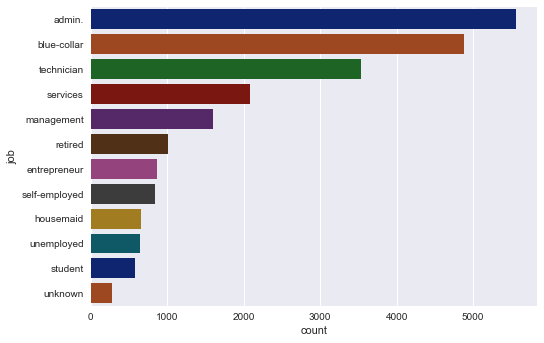

marital
-------


,marital_category,count,percentage
1,unknown,320,1.42
2,divorced,2658,11.81
3,single,6344,28.20
4,married,13178,58.57


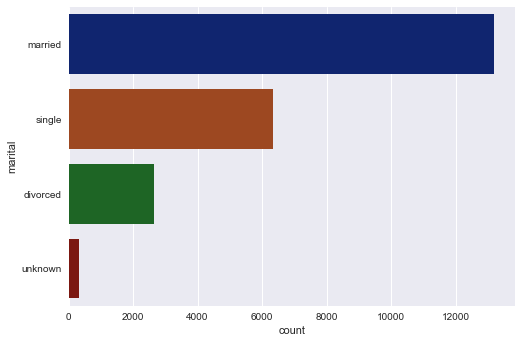

education
---------


,education_category,count,percentage
1,illiterate,161,0.72
2,unknown,994,4.42
3,basic.6y,1349,6.00
4,basic.4y,2322,10.32
5,professional.course,2853,12.68
6,basic.9y,3266,14.52
7,high.school,5031,22.36
8,university.degree,6524,29.00


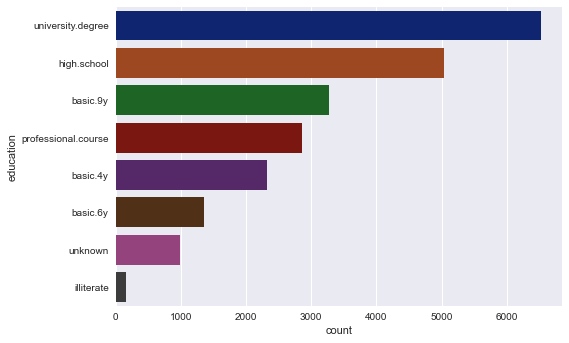

default
-------


,default_category,count,percentage
1,yes,379,1.68
2,unknown,4860,21.60
3,no,17261,76.72


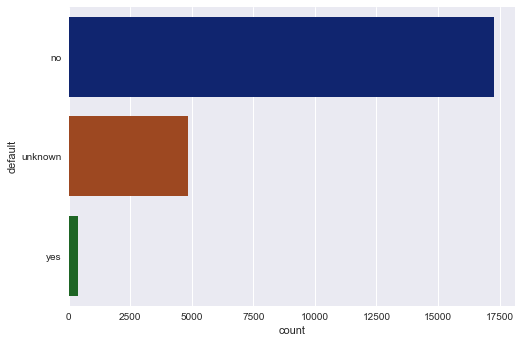

housing
-------


,housing_category,count,percentage
1,unknown,886,3.94
2,no,10046,44.65
3,yes,11568,51.41


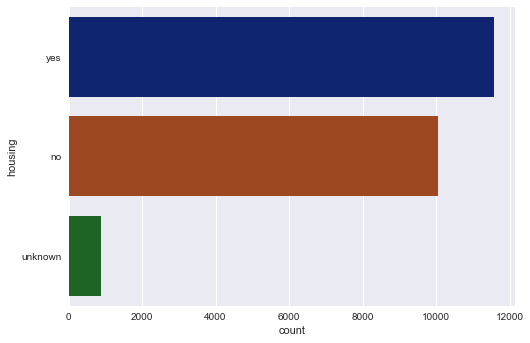

loan
----


,loan_category,count,percentage
1,unknown,889,3.95
2,yes,3657,16.25
3,no,17954,79.80


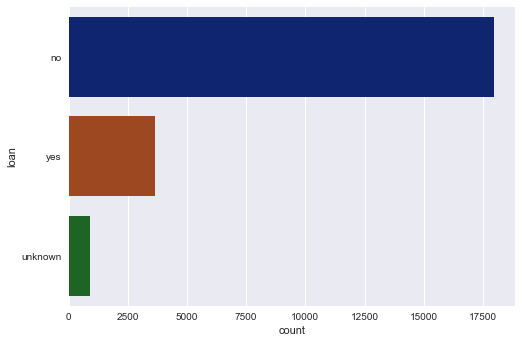

contact
-------


,contact_category,count,percentage
1,telephone,8319,36.97
2,cellular,14181,63.03


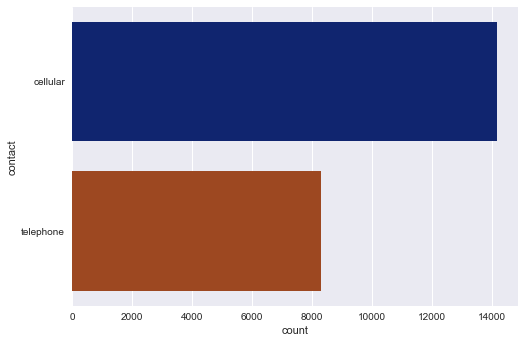

month
-----


,month_category,count,percentage
1,dec,199,0.88
2,sep,401,1.78
3,mar,426,1.89
4,oct,494,2.20
5,apr,1510,6.71
6,nov,2242,9.96
7,jun,2838,12.61
8,aug,3340,14.84
9,jul,3815,16.96
10,may,7235,32.16


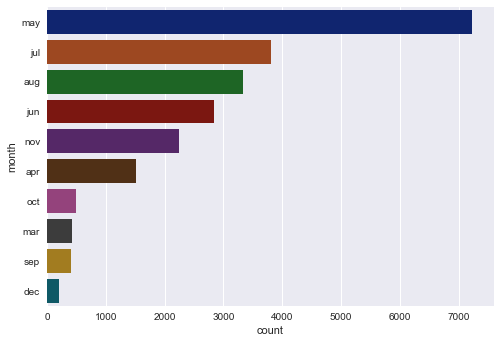

day_of_week
-----------


,day_of_week_category,count,percentage
1,fri,4247,18.88
2,tue,4414,19.62
3,wed,4458,19.81
4,mon,4653,20.68
5,thu,4728,21.01


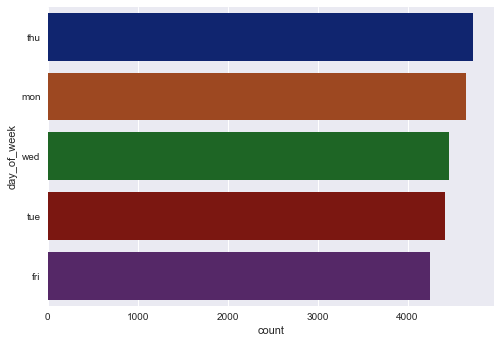

poutcome
--------


,poutcome_category,count,percentage
1,success,3440,15.29
2,failure,4442,19.74
3,nonexistent,14618,64.97


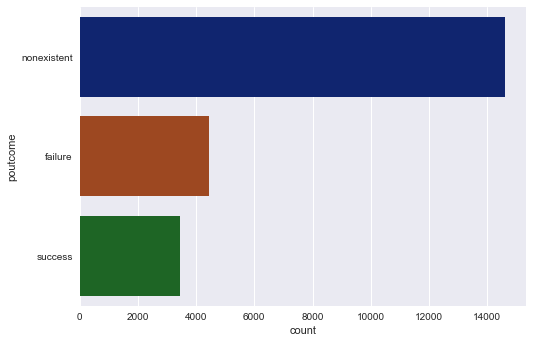

subscribe
---------


,subscribe_category,count,percentage
1,yes,2952,13.12
2,no,19548,86.88


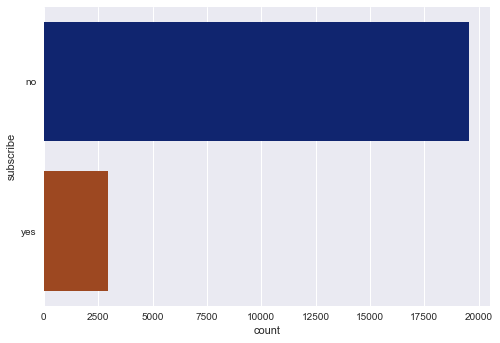

In [16]:
for i in df.select_dtypes('O').columns.to_list():
    compare_categories_in_column(df, i)

In [17]:
def compare_to_subscribe(coloum_name):
    
    # Comparing values
    df['subscribe_count'] = df['subscribe']
    pivot_table = df.pivot_table(
         index=[coloum_name, 'subscribe'],
         values='subscribe_count',
        aggfunc=np.count_nonzero
    )
    df.drop(columns=['subscribe_count'], axis=1, inplace=True)
    display(pivot_table)
    
    # Create a bar graph that shows the relationship between "some_coloum" and "subscribe"
    sns.countplot(y=coloum_name, hue='subscribe', data=df, palette='dark', order=df[coloum_name].value_counts().index[::1])

    # Add a title and labels
    plt.title(coloum_name + ' vs subscribe')
    plt.ylabel(coloum_name)
    plt.xlabel('count')

    plt.xticks(rotation=45)
    plt.grid(visible=True, color='gray', linestyle='-.', linewidth=0.5)

    # Show the plot
    plt.show()

subscribe_count
job           subscribe                 
admin.        no                    4827
              yes                    730
blue-collar   no                    4506
              yes                    368
entrepreneur  no                     757
              yes                    106
housemaid     no                     559
              yes                     98
management    no                    1383
              yes                    217
retired       no                     734
              yes                    272
self-employed no                     699
              yes                    137
services      no                    1882
              yes                    201
student       no                     384
              yes                    189
technician    no                    3098
              yes                    432
unemployed    no                     516
              yes                    131
unknown       no                     203
              yes                     71

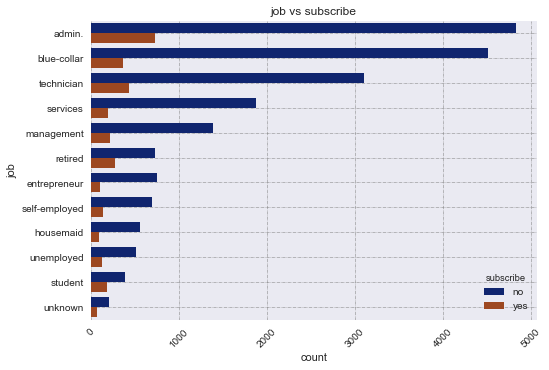

subscribe_count
marital  subscribe                 
divorced no                    2306
         yes                    352
married  no                   11767
         yes                   1411
single   no                    5301
         yes                   1043
unknown  no                     174
         yes                    146

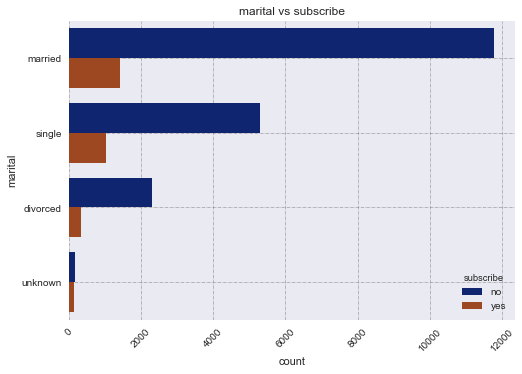

subscribe_count
education           subscribe                 
basic.4y            no                    2040
                    yes                    282
basic.6y            no                    1185
                    yes                    164
basic.9y            no                    2961
                    yes                    305
high.school         no                    4444
                    yes                    587
illiterate          no                      80
                    yes                     81
professional.course no                    2462
                    yes                    391
university.degree   no                    5563
                    yes                    961
unknown             no                     813
                    yes                    181

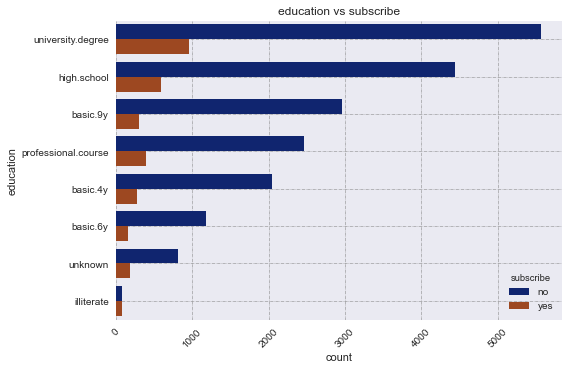

subscribe_count
default subscribe                 
no      no                   14912
        yes                   2349
unknown no                    4456
        yes                    404
yes     no                     180
        yes                    199

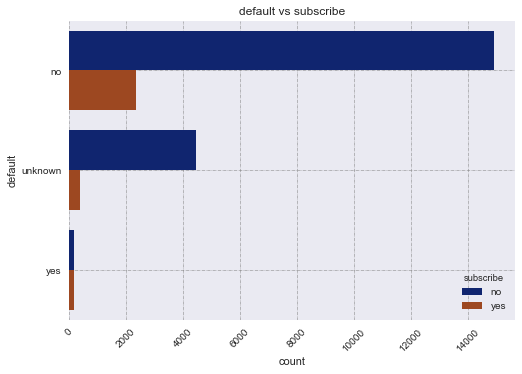

subscribe_count
housing subscribe                 
no      no                    8793
        yes                   1253
unknown no                     661
        yes                    225
yes     no                   10094
        yes                   1474

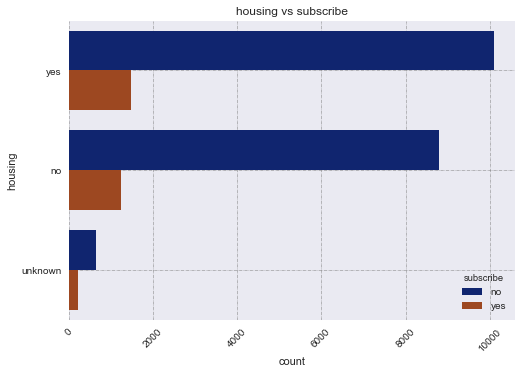

subscribe_count
loan    subscribe                 
no      no                   15785
        yes                   2169
unknown no                     623
        yes                    266
yes     no                    3140
        yes                    517

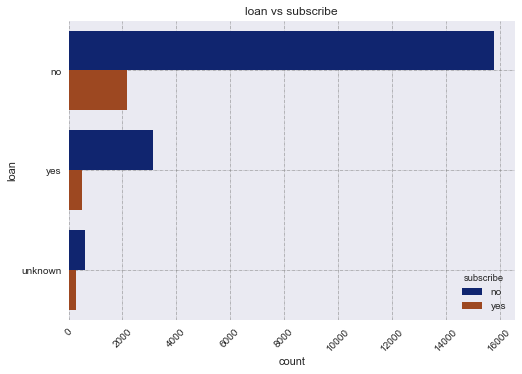

subscribe_count
contact   subscribe                 
cellular  no                   11883
          yes                   2298
telephone no                    7665
          yes                    654

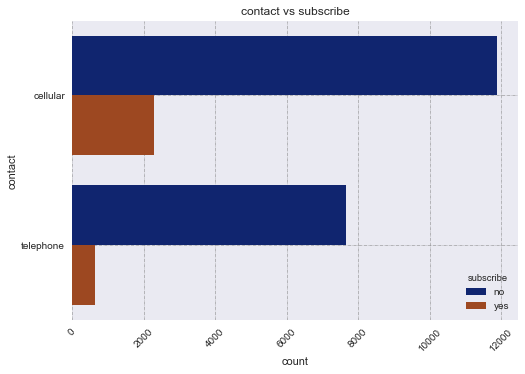

subscribe_count
month subscribe                 
apr   no                    1188
      yes                    322
aug   no                    2943
      yes                    397
dec   no                      96
      yes                    103
jul   no                    3422
      yes                    393
jun   no                    2498
      yes                    340
mar   no                     211
      yes                    215
may   no                    6730
      yes                    505
nov   no                    1988
      yes                    254
oct   no                     267
      yes                    227
sep   no                     205
      yes                    196

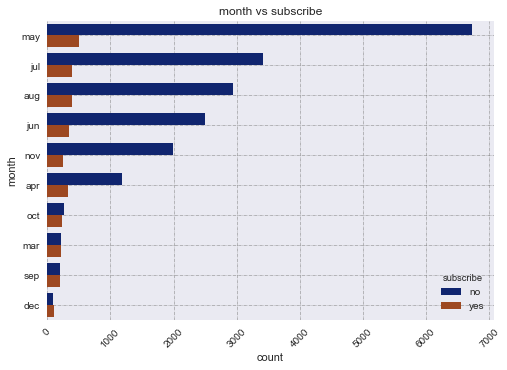

subscribe_count
day_of_week subscribe                 
fri         no                    3718
            yes                    529
mon         no                    4117
            yes                    536
thu         no                    4058
            yes                    670
tue         no                    3785
            yes                    629
wed         no                    3870
            yes                    588

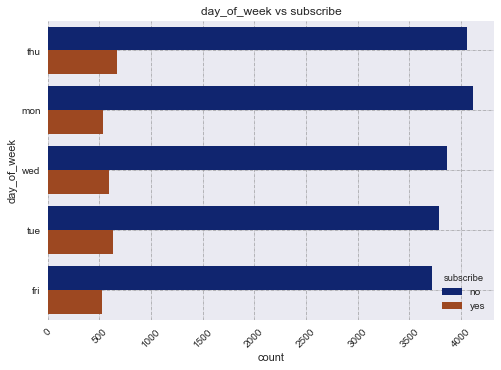

subscribe_count
poutcome    subscribe                 
failure     no                    3777
            yes                    665
nonexistent no                   13014
            yes                   1604
success     no                    2757
            yes                    683

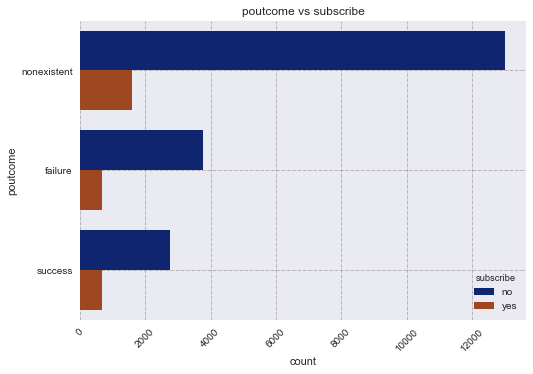

In [18]:
for i in df.select_dtypes('O').columns.to_list():
    if i != "subscribe":
        compare_to_subscribe(i)

In [19]:
def convert_object_to_int(dataframe):
    df = dataframe.copy()
    for i in df.select_dtypes('O').columns.to_list():
        categories = df[i].unique()
        contain_unknown = False

        for j in categories:
            if j == 'unknown':
                contain_unknown = True

        if contain_unknown:
            index = np.argwhere(categories == 'unknown')[0][0]
            categories = np.roll(categories, -index)

        df[i].replace(categories, range(len(categories)), inplace=True)
    return df

In [20]:
df_label_encoded = convert_object_to_int(df)
df_label_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,49,1,1,4,2,1,1,0,0,0,...,1,115,2,0,1.4,92.479703,-35.498996,0.705058,4990.198481,0
1,52,2,2,5,0,1,2,0,1,0,...,1,402,2,1,-1.8,93.439161,-39.331320,4.245479,5144.563621,1
2,46,3,1,6,2,2,2,0,2,1,...,1,999,1,0,-1.8,93.075000,-47.100000,1.445000,5099.100000,0
3,26,4,3,5,1,1,1,0,0,2,...,28,999,0,1,1.4,93.444000,-36.100000,4.967000,5228.100000,1
4,47,1,3,7,2,2,2,0,3,3,...,1,252,4,2,-3.4,94.352376,-33.073620,1.208702,5025.420036,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,33,1,2,5,2,2,2,0,0,2,...,3,901,3,0,-2.9,92.570527,-45.491308,3.533396,5177.336146,1
22496,34,1,1,5,2,0,0,0,0,2,...,15,524,3,0,1.4,92.809945,-27.601325,4.651084,5004.892544,0
22497,27,1,2,4,2,1,2,0,1,4,...,1,757,5,2,-1.8,94.301672,-38.211994,4.092928,4994.439635,0
22498,55,10,2,5,2,1,2,1,1,3,...,5,999,0,1,1.1,93.994000,-36.400000,4.857000,5191.000000,0


### Training and testing the train data

In [21]:
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

In [22]:
def train_test_data(df, model):
    x = df.drop('subscribe', axis=1)
    y = df.subscribe
    
    # Perform 5-fold cross-validation and calculate the mean F1 score
    f1_scores = cross_val_score(
                                model, 
                                x, y, 
                                cv=5, 
                                scoring='f1'
                               )
    
    # Print the mean F1 score
    print('\nF1 Scores:', list(f1_scores))
    mean_f1_score = f1_scores.mean()
    print('Mean F1 Score:', mean_f1_score)

### Training and Testing df_label_encoded

In [23]:
# Initialize the CatBoostClassifier
model = CatBoostClassifier(
                            iterations = 1000, 
                            depth = 10, 
                            learning_rate = 0.1,
                            eval_metric = 'F1',
                            verbose = 200
                          )

In [24]:
train_test_data(df_label_encoded, model)

0:	learn: 0.3213095	total: 179ms	remaining: 2m 59s
200:	learn: 0.9169691	total: 14.5s	remaining: 57.6s
400:	learn: 0.9854077	total: 27.8s	remaining: 41.5s
600:	learn: 0.9976660	total: 40.9s	remaining: 27.1s
800:	learn: 1.0000000	total: 54s	remaining: 13.4s
999:	learn: 1.0000000	total: 1m 7s	remaining: 0us
0:	learn: 0.3853943	total: 70.6ms	remaining: 1m 10s
200:	learn: 0.9157943	total: 13.3s	remaining: 52.7s
400:	learn: 0.9869239	total: 26.5s	remaining: 39.6s
600:	learn: 0.9985160	total: 39.6s	remaining: 26.3s
800:	learn: 1.0000000	total: 52.9s	remaining: 13.2s
999:	learn: 1.0000000	total: 1m 33s	remaining: 0us
0:	learn: 0.3979298	total: 222ms	remaining: 3m 42s
200:	learn: 0.9130336	total: 44.5s	remaining: 2m 56s
400:	learn: 0.9840929	total: 1m 27s	remaining: 2m 11s
600:	learn: 0.9985160	total: 2m 11s	remaining: 1m 27s
800:	learn: 0.9995765	total: 2m 58s	remaining: 44.3s
999:	learn: 1.0000000	total: 3m 42s	remaining: 0us
0:	learn: 0.3656307	total: 230ms	remaining: 3m 50s
200:	learn: 0.9

### Balancing  the date

In [23]:
from imblearn.over_sampling import RandomOverSampler

In [24]:
def Counter(y):
    output = {}
    for i in y.value_counts().index:
        output[i] = y.value_counts()[i]
    return str(output)

In [25]:
def balance_data(df):
    os = RandomOverSampler(random_state=42)
    
    x = df.drop('subscribe', axis=1)
    y = df.subscribe
    
    x_overSample, y_overSample = os.fit_resample(x, y)
    
    print("Original: {}".format(Counter(y)))
    print("After Over Sampling: {}".format(Counter(y_overSample)))
    
    df_overSample = x_overSample
    df_overSample['subscribe'] = y_overSample
    
    return df_overSample

### Balancing the df_label_encoded

In [26]:
df_label_encoded_overSample = balance_data(df_label_encoded)
df_label_encoded_overSample

Original: {0: 19548, 1: 2952}
After Over Sampling: {0: 19548, 1: 19548}


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,49,1,1,4,2,1,1,0,0,0,...,1,115,2,0,1.4,92.479703,-35.498996,0.705058,4990.198481,0
1,52,2,2,5,0,1,2,0,1,0,...,1,402,2,1,-1.8,93.439161,-39.331320,4.245479,5144.563621,1
2,46,3,1,6,2,2,2,0,2,1,...,1,999,1,0,-1.8,93.075000,-47.100000,1.445000,5099.100000,0
3,26,4,3,5,1,1,1,0,0,2,...,28,999,0,1,1.4,93.444000,-36.100000,4.967000,5228.100000,1
4,47,1,3,7,2,2,2,0,3,3,...,1,252,4,2,-3.4,94.352376,-33.073620,1.208702,5025.420036,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39091,38,3,2,6,2,2,2,0,4,2,...,1,999,0,1,1.4,93.918000,-42.700000,4.957000,5228.100000,1
39092,26,1,3,7,2,2,2,0,3,2,...,3,214,1,0,-1.1,94.484877,-28.709015,0.656009,5168.817479,1
39093,76,10,2,7,2,1,1,0,7,4,...,2,939,5,2,-3.0,93.438493,-43.029625,4.525016,5151.156915,1
39094,29,6,3,2,0,0,0,0,2,4,...,49,999,0,1,-1.8,92.893000,-46.200000,1.313000,5099.100000,1


### Training and Testing df_label_encoded_overSample

In [29]:
# Initialize the CatBoostClassifier
model = CatBoostClassifier(
                            iterations = 1000, 
                            depth = 10, 
                            learning_rate = 0.1,
                            eval_metric = 'F1',
                            verbose = 200
                          )

In [30]:
train_test_data(df_label_encoded_overSample, model)

0:	learn: 0.8184619	total: 45.4ms	remaining: 45.3s
200:	learn: 0.9847039	total: 11.6s	remaining: 46.1s
400:	learn: 0.9979893	total: 20.7s	remaining: 30.8s
600:	learn: 0.9997762	total: 28.7s	remaining: 19s
800:	learn: 0.9999680	total: 37s	remaining: 9.2s
999:	learn: 1.0000000	total: 45.1s	remaining: 0us
0:	learn: 0.8194087	total: 50.3ms	remaining: 50.3s
200:	learn: 0.9834254	total: 9.09s	remaining: 36.1s
400:	learn: 0.9974485	total: 18s	remaining: 26.9s
600:	learn: 0.9998082	total: 26.2s	remaining: 17.4s
800:	learn: 1.0000000	total: 34.8s	remaining: 8.64s
999:	learn: 1.0000000	total: 42.8s	remaining: 0us
0:	learn: 0.8148194	total: 46.1ms	remaining: 46s
200:	learn: 0.9828016	total: 8.78s	remaining: 34.9s
400:	learn: 0.9972889	total: 17.4s	remaining: 26s
600:	learn: 0.9997123	total: 25.8s	remaining: 17.1s
800:	learn: 0.9999680	total: 34.8s	remaining: 8.66s
999:	learn: 1.0000000	total: 43.2s	remaining: 0us
0:	learn: 0.8188804	total: 42.7ms	remaining: 42.7s
200:	learn: 0.9832476	total: 8.8s

### One Hot Encoding

In [27]:
df_one_hot_encoded = pd.get_dummies(df, columns = df.select_dtypes('O').columns.to_list())
df_one_hot_encoded

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribe_no,subscribe_yes
0,49,4457,1,115,2,1.4,92.479703,-35.498996,0.705058,4990.198481,...,0,1,0,0,0,1,0,0,1,0
1,52,4797,1,402,2,-1.8,93.439161,-39.331320,4.245479,5144.563621,...,0,1,0,0,0,0,1,0,0,1
2,46,169,1,999,1,-1.8,93.075000,-47.100000,1.445000,5099.100000,...,0,0,0,0,1,1,0,0,1,0
3,26,376,28,999,0,1.4,93.444000,-36.100000,4.967000,5228.100000,...,1,0,0,0,0,0,1,0,0,1
4,47,3033,1,252,4,-3.4,94.352376,-33.073620,1.208702,5025.420036,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,33,4199,3,901,3,-2.9,92.570527,-45.491308,3.533396,5177.336146,...,1,0,0,0,0,1,0,0,0,1
22496,34,3284,15,524,3,1.4,92.809945,-27.601325,4.651084,5004.892544,...,1,0,0,0,0,1,0,0,1,0
22497,27,2329,1,757,5,-1.8,94.301672,-38.211994,4.092928,4994.439635,...,0,0,1,0,0,0,0,1,1,0
22498,55,591,5,999,0,1.1,93.994000,-36.400000,4.857000,5191.000000,...,0,0,0,1,0,0,1,0,1,0


In [28]:
print("All Obj column:")
print(df.select_dtypes('O').columns.to_list())

obj_column_with_unknown = []
obj_column_with_no_unknown = []

for i in df.select_dtypes('O').columns.to_list():
    for j in df[i].unique():
        if j == 'unknown':
            obj_column_with_unknown.append(i)
            
for i in df.select_dtypes('O').columns.to_list():
    if i not in obj_column_with_unknown:
        obj_column_with_no_unknown.append(i)
obj_column_with_no_unknown.remove('subscribe')

print("\nObj column with unknown:")
print(obj_column_with_unknown)

print("\nObj column with no unknown:")
print(obj_column_with_no_unknown)

All Obj column:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'subscribe']

Obj column with unknown:
['job', 'marital', 'education', 'default', 'housing', 'loan']

Obj column with no unknown:
['contact', 'month', 'day_of_week', 'poutcome']


In [29]:
# for column containing unknown
to_delete_column = []
for i in obj_column_with_unknown:
    to_delete_column.append(i+'_unknown')

# for column not containing unknown
for i in obj_column_with_no_unknown:
    # print(i)
    # print(df[i].value_counts().sort_values().index[0])
    # display(df[i].value_counts().sort_values())
    to_delete_column.append(i +'_'+ df[i].value_counts().sort_values().index[0])
print('To delete column: ', to_delete_column)

To delete column:  ['job_unknown', 'marital_unknown', 'education_unknown', 'default_unknown', 'housing_unknown', 'loan_unknown', 'contact_telephone', 'month_dec', 'day_of_week_fri', 'poutcome_success']


In [30]:
df['poutcome'].value_counts().sort_values()

success         3440
failure         4442
nonexistent    14618
Name: poutcome, dtype: int64

In [31]:
df_test['poutcome'].value_counts().sort_values()

success        1169
failure        1482
nonexistent    4849
Name: poutcome, dtype: int64

In [32]:
to_delete_column[-1] = 'poutcome_nonexistent'
to_delete_column

['job_unknown',
 'marital_unknown',
 'education_unknown',
 'default_unknown',
 'housing_unknown',
 'loan_unknown',
 'contact_telephone',
 'month_dec',
 'day_of_week_fri',
 'poutcome_nonexistent']

In [33]:
# deleting the neccessary column
df_one_hot_encoded.drop(to_delete_column, axis='columns', inplace = True)

# dealing with 'sunscribe' column
df_one_hot_encoded.drop(['subscribe_no'], axis='columns', inplace = True)
df_one_hot_encoded = df_one_hot_encoded.rename(columns={'subscribe_yes': 'subscribe'})

# arranging the columns in ascending order
df_one_hot_encoded = df_one_hot_encoded.sort_index(axis=1)

df_one_hot_encoded

,age,campaign,cons.conf.idx,cons.price.idx,contact_cellular,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,default_no,...,month_may,month_nov,month_oct,month_sep,nr.employed,pdays,poutcome_failure,poutcome_success,previous,subscribe
0,49,1,-35.498996,92.479703,1,1,0,0,0,1,...,0,0,0,0,4990.198481,115,1,0,2,0
1,52,1,-39.331320,93.439161,1,1,0,0,0,0,...,1,0,0,0,5144.563621,402,0,0,2,1
2,46,1,-47.100000,93.075000,1,0,0,0,1,1,...,0,0,0,0,5099.100000,999,1,0,1,0
3,26,28,-36.100000,93.444000,1,0,0,0,0,0,...,0,0,0,0,5228.100000,999,0,0,0,1
4,47,1,-33.073620,94.352376,1,0,0,1,0,1,...,0,1,0,0,5025.420036,252,0,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,33,3,-45.491308,92.570527,1,0,0,0,0,1,...,0,0,0,0,5177.336146,901,1,0,3,1
22496,34,15,-27.601325,92.809945,1,0,0,0,0,1,...,0,0,0,0,5004.892544,524,1,0,3,0
22497,27,1,-38.211994,94.301672,1,0,1,0,0,1,...,1,0,0,0,4994.439635,757,0,1,5,0
22498,55,5,-36.400000,93.994000,0,0,0,1,0,1,...,1,0,0,0,5191.000000,999,0,0,0,0


### Training and Testing the df_one_hot_endoded

In [38]:
# Initialize the CatBoostClassifier
model = CatBoostClassifier(
                            iterations = 1000, 
                            depth = 10, 
                            learning_rate = 0.1,
                            eval_metric = 'F1',
                            verbose = 200
                          )

In [39]:
train_test_data(df_one_hot_encoded, model)

0:	learn: 0.2449982	total: 85.8ms	remaining: 1m 25s
200:	learn: 0.9147921	total: 7.95s	remaining: 31.6s
400:	learn: 0.9869183	total: 15.7s	remaining: 23.5s
600:	learn: 0.9983036	total: 24.6s	remaining: 16.3s
800:	learn: 0.9997883	total: 34.2s	remaining: 8.5s
999:	learn: 1.0000000	total: 44.8s	remaining: 0us
0:	learn: 0.3304570	total: 47.4ms	remaining: 47.4s
200:	learn: 0.9006928	total: 8.27s	remaining: 32.9s
400:	learn: 0.9825544	total: 16.8s	remaining: 25.2s
600:	learn: 0.9983036	total: 25.5s	remaining: 16.9s
800:	learn: 0.9997883	total: 34.1s	remaining: 8.47s
999:	learn: 1.0000000	total: 42.9s	remaining: 0us
0:	learn: 0.2630137	total: 37.4ms	remaining: 37.4s
200:	learn: 0.9044439	total: 8.55s	remaining: 34s
400:	learn: 0.9869183	total: 17.3s	remaining: 25.8s
600:	learn: 0.9980912	total: 26s	remaining: 17.3s
800:	learn: 0.9997883	total: 34.7s	remaining: 8.63s
999:	learn: 1.0000000	total: 43.3s	remaining: 0us
0:	learn: 0.2507903	total: 38.5ms	remaining: 38.5s
200:	learn: 0.9110450	tota

### Balancing the df_one_hot_encoded

In [34]:
df_one_hot_encoded_overSample = balance_data(df_one_hot_encoded)
df_one_hot_encoded_overSample

Original: {0: 19548, 1: 2952}
After Over Sampling: {0: 19548, 1: 19548}


,age,campaign,cons.conf.idx,cons.price.idx,contact_cellular,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,default_no,...,month_may,month_nov,month_oct,month_sep,nr.employed,pdays,poutcome_failure,poutcome_success,previous,subscribe
0,49,1,-35.498996,92.479703,1,1,0,0,0,1,...,0,0,0,0,4990.198481,115,1,0,2,0
1,52,1,-39.331320,93.439161,1,1,0,0,0,0,...,1,0,0,0,5144.563621,402,0,0,2,1
2,46,1,-47.100000,93.075000,1,0,0,0,1,1,...,0,0,0,0,5099.100000,999,1,0,1,0
3,26,28,-36.100000,93.444000,1,0,0,0,0,0,...,0,0,0,0,5228.100000,999,0,0,0,1
4,47,1,-33.073620,94.352376,1,0,0,1,0,1,...,0,1,0,0,5025.420036,252,0,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39091,38,1,-42.700000,93.918000,1,0,0,0,0,1,...,0,0,0,0,5228.100000,999,0,0,0,1
39092,26,3,-28.709015,94.484877,1,0,0,0,0,1,...,0,1,0,0,5168.817479,214,1,0,1,1
39093,76,2,-43.029625,93.438493,1,0,1,0,0,1,...,0,0,0,0,5151.156915,939,0,1,5,1
39094,29,49,-46.200000,92.893000,1,0,1,0,0,0,...,0,0,0,0,5099.100000,999,0,0,0,1


### Training and Testing the df_one_hot_encoded

In [41]:
# Initialize the CatBoostClassifier
model = CatBoostClassifier(
                            iterations = 1000, 
                            depth = 10, 
                            learning_rate = 0.1,
                            eval_metric = 'F1',
                            verbose = 200
                          )

In [42]:
train_test_data(df_one_hot_encoded_overSample, model)

0:	learn: 0.8074523	total: 50.5ms	remaining: 50.4s
200:	learn: 0.9803303	total: 9.59s	remaining: 38.1s
400:	learn: 0.9968428	total: 19.2s	remaining: 28.6s
600:	learn: 0.9997442	total: 28.8s	remaining: 19.1s
800:	learn: 0.9999680	total: 38.5s	remaining: 9.57s
999:	learn: 1.0000000	total: 47.9s	remaining: 0us
0:	learn: 0.8069838	total: 46.4ms	remaining: 46.3s
200:	learn: 0.9810441	total: 9.64s	remaining: 38.3s
400:	learn: 0.9974795	total: 20.1s	remaining: 30s
600:	learn: 0.9996484	total: 29.8s	remaining: 19.8s
800:	learn: 0.9999680	total: 39.4s	remaining: 9.78s
999:	learn: 1.0000000	total: 49s	remaining: 0us
0:	learn: 0.8071879	total: 42.6ms	remaining: 42.6s
200:	learn: 0.9815498	total: 9.62s	remaining: 38.3s
400:	learn: 0.9978296	total: 19.3s	remaining: 28.8s
600:	learn: 0.9998402	total: 28.9s	remaining: 19.2s
800:	learn: 1.0000000	total: 38.5s	remaining: 9.55s
999:	learn: 1.0000000	total: 47.9s	remaining: 0us
0:	learn: 0.8097319	total: 41.3ms	remaining: 41.2s
200:	learn: 0.9811606	tota

### Training the full dataset

In [35]:
def train_full_dataset(df, model):
    x = df.drop('subscribe', axis=1)
    y = df.subscribe
    model.fit(x, y)

### Creating submission file

In [36]:
def create_submission_file(y_pred, filename):
    df_submission = pd.DataFrame(df_test.RecordID)
    df_submission['subscribe'] = y_pred
    df_submission['subscribe'] = df_submission['subscribe'].map({0: 'no', 1: 'yes'})
    df_submission.to_csv("submissions/" + filename + ".csv", index=False)

### Saving the model

In [37]:
import joblib

In [38]:
def save_model(model, model_name):
    joblib.dump(model, "models/" + model_name + ".joblib")

### Test df_label_encoded_overSample

In [47]:
# model
model = CatBoostClassifier(
                            iterations = 1000, 
                            depth = 10, 
                            learning_rate = 0.1,
                            eval_metric = 'F1',
                            verbose = 200
                          )

# Training the full dataset
train_full_dataset(df_label_encoded_overSample, model)

# making the prediction
df_test = pd.read_csv('data/test.csv')
x = df_test.drop("RecordID", axis=1)
x = convert_object_to_int(x)

y_pred = model.predict(x)

# creating the submission file
create_submission_file(y_pred, "df_label_encoded_overSample-model_CatBoostClassifer_1000_10_0.1")

# saving the model
save_model(model, "df_label_encoded_overSample-model_CatBoostClassifer_1000_10_0.1")

0:	learn: 0.8195356	total: 54ms	remaining: 53.9s
200:	learn: 0.9814983	total: 12s	remaining: 47.9s
400:	learn: 0.9967613	total: 23.4s	remaining: 35s
600:	learn: 0.9992843	total: 33.1s	remaining: 22s
800:	learn: 0.9999744	total: 42.7s	remaining: 10.6s
999:	learn: 1.0000000	total: 52.1s	remaining: 0us


### Test df_one_hot_encoded_overSample

In [48]:
# model
model = CatBoostClassifier(
                            iterations = 1000, 
                            depth = 10, 
                            learning_rate = 0.1,
                            eval_metric = 'F1',
                            verbose = 200
                          )

# Training the full dataset
train_full_dataset(df_one_hot_encoded_overSample, model)

# making the prediction
df_test = pd.read_csv('data/test.csv')
x = df_test.drop("RecordID", axis=1)
x = pd.get_dummies(x, columns = x.select_dtypes('O').columns.to_list())
x.drop(to_delete_column, axis='columns', inplace = True)
x.sort_index(axis=1)

y_pred = model.predict(x)

# creating the submission file
create_submission_file(y_pred, "df_one_hot_encoded_overSample-model_CatBoostClassifer_1000_10_0.1")

# saving the model
save_model(model, "df_one_hot_encoded_overSample-model_CatBoostClassifer_1000_10_0.1")

0:	learn: 0.8099920	total: 43ms	remaining: 43s
200:	learn: 0.9797726	total: 9.7s	remaining: 38.6s
400:	learn: 0.9962018	total: 20s	remaining: 29.9s
600:	learn: 0.9995398	total: 30.1s	remaining: 20s
800:	learn: 0.9999233	total: 40.2s	remaining: 9.99s
999:	learn: 1.0000000	total: 50.1s	remaining: 0us


### Test df_label_encoded

In [62]:
# model
model = CatBoostClassifier(
                            iterations = 1000, 
                            depth = 10, 
                            learning_rate = 0.1,
                            eval_metric = 'F1',
                            verbose = 200
                          )

# Training the full dataset
train_full_dataset(df_label_encoded, model)

# making the prediction
df_test = pd.read_csv('data/test.csv')
x = df_test.drop("RecordID", axis=1)
x = convert_object_to_int(x)

y_pred = model.predict(x)

# creating the submission file
create_submission_file(y_pred, "df_label_encoded-model_CatBoostClassifer_1000_10_0.1")

# saving the model
save_model(model, "df_label_encoded-model_CatBoostClassifer_1000_10_0.1")

0:	learn: 0.3622679	total: 50.4ms	remaining: 50.4s
200:	learn: 0.8918069	total: 8.26s	remaining: 32.9s
400:	learn: 0.9747142	total: 16.5s	remaining: 24.6s
600:	learn: 0.9948945	total: 24.6s	remaining: 16.4s
800:	learn: 0.9998306	total: 33.1s	remaining: 8.21s
999:	learn: 1.0000000	total: 41.2s	remaining: 0us


### Test df_one_hot_encoded

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
# model
# model = CatBoostClassifier(
#                             iterations = 1000, 
#                             depth = 8, 
#                             learning_rate = 0.2,
#                             eval_metric = 'F1',
#                             verbose = 200
#                           )
model = RandomForestClassifier(
                                n_estimators = 530, 
#                                 max_depth = 10, 
                                max_features = 'sqrt', 
                                random_state = 42,
                               )

# Training the full dataset
train_full_dataset(df_one_hot_encoded.sort_index(axis=1), model)

# making the prediction
df_test = pd.read_csv('data/test.csv')
x = df_test.drop("RecordID", axis=1)
x = pd.get_dummies(x, columns = x.select_dtypes('O').columns.to_list())
x.drop(to_delete_column, axis='columns', inplace = True)
x.sort_index(axis=1)

y_pred = model.predict(x)

# creating the submission file
create_submission_file(y_pred, "df_one_hot_encoded-model_RandomForestClassifier_530_sqrt_42")

# saving the model
save_model(model, "df_one_hot_encoded-model_RandomForestClassifier_530_sqrt_42")

c:\users\yash meshram\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [39]:
from sklearn.model_selection import GridSearchCV

# define the parameter grid to search over
param_grid = {
    'iterations': [1000, 1200, 1500],
    'depth': [8, 10, 12],
    'learning_rate': [0.05, 0.1, 0.2],
}

# create a CatBoost classifier object
catboost = CatBoostClassifier(eval_metric='F1', verbose=200)

# perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(catboost, param_grid, cv=5, scoring='f1')

# data
X_train = df_one_hot_encoded.drop("subscribe", axis=1)
y_train = df_one_hot_encoded.subscribe

# fit the grid search object to the data
grid_search.fit(X_train, y_train)

# print the best parameters and mean F1-score
print("Best parameters: ", grid_search.best_params_)
print("Best mean F1-score: ", grid_search.best_score_)


0:	learn: 0.2210339	total: 238ms	remaining: 3m 57s
200:	learn: 0.6519543	total: 2.97s	remaining: 11.8s
400:	learn: 0.7803198	total: 5.46s	remaining: 8.16s
600:	learn: 0.8450570	total: 7.94s	remaining: 5.27s
800:	learn: 0.8954263	total: 10.5s	remaining: 2.61s
999:	learn: 0.9323173	total: 13.1s	remaining: 0us
0:	learn: 0.2683339	total: 19.7ms	remaining: 19.7s
200:	learn: 0.6506350	total: 2.61s	remaining: 10.4s
400:	learn: 0.7773057	total: 5.31s	remaining: 7.94s
600:	learn: 0.8497137	total: 7.79s	remaining: 5.17s
800:	learn: 0.8918169	total: 10.4s	remaining: 2.58s
999:	learn: 0.9236347	total: 12.9s	remaining: 0us
0:	learn: 0.2565857	total: 16.8ms	remaining: 16.8s
200:	learn: 0.6515232	total: 2.88s	remaining: 11.5s
400:	learn: 0.7804272	total: 5.41s	remaining: 8.08s
600:	learn: 0.8544334	total: 8.09s	remaining: 5.37s
800:	learn: 0.8983441	total: 10.8s	remaining: 2.67s
999:	learn: 0.9325566	total: 13.3s	remaining: 0us
0:	learn: 0.2246869	total: 14ms	remaining: 14s
200:	learn: 0.6545649	tota

0:	learn: 0.2210339	total: 17.7ms	remaining: 21.2s
200:	learn: 0.8952556	total: 2.51s	remaining: 12.5s
400:	learn: 0.9838744	total: 5.05s	remaining: 10.1s
600:	learn: 0.9972405	total: 7.54s	remaining: 7.52s
800:	learn: 0.9995765	total: 10s	remaining: 4.99s
1000:	learn: 1.0000000	total: 12.6s	remaining: 2.51s
1199:	learn: 1.0000000	total: 15.4s	remaining: 0us
0:	learn: 0.2683339	total: 16.4ms	remaining: 19.6s
200:	learn: 0.8922652	total: 2.5s	remaining: 12.4s
400:	learn: 0.9795038	total: 4.99s	remaining: 9.95s
600:	learn: 0.9968146	total: 7.5s	remaining: 7.47s
800:	learn: 0.9997883	total: 10s	remaining: 5s
1000:	learn: 1.0000000	total: 12.5s	remaining: 2.49s
1199:	learn: 1.0000000	total: 15s	remaining: 0us
0:	learn: 0.2565857	total: 12.9ms	remaining: 15.4s
200:	learn: 0.8983051	total: 2.54s	remaining: 12.6s
400:	learn: 0.9819121	total: 5.04s	remaining: 10s
600:	learn: 0.9959617	total: 7.56s	remaining: 7.54s
800:	learn: 0.9995765	total: 10.1s	remaining: 5.02s
1000:	learn: 1.0000000	total

1400:	learn: 1.0000000	total: 23.6s	remaining: 1.67s
1499:	learn: 1.0000000	total: 25s	remaining: 0us
0:	learn: 0.2461431	total: 13.4ms	remaining: 20s
200:	learn: 0.9019248	total: 2.73s	remaining: 17.7s
400:	learn: 0.9790632	total: 5.8s	remaining: 15.9s
600:	learn: 0.9959600	total: 8.83s	remaining: 13.2s
800:	learn: 0.9997882	total: 11.9s	remaining: 10.4s
1000:	learn: 1.0000000	total: 14.9s	remaining: 7.45s
1200:	learn: 1.0000000	total: 18s	remaining: 4.49s
1400:	learn: 1.0000000	total: 21s	remaining: 1.49s
1499:	learn: 1.0000000	total: 22.5s	remaining: 0us
0:	learn: 0.2449982	total: 43.3ms	remaining: 43.3s
200:	learn: 0.7924994	total: 9.32s	remaining: 37s
400:	learn: 0.9145980	total: 18s	remaining: 26.9s
600:	learn: 0.9641608	total: 26.7s	remaining: 17.8s
800:	learn: 0.9875697	total: 36.7s	remaining: 9.12s
999:	learn: 0.9946797	total: 46.3s	remaining: 0us
0:	learn: 0.3304570	total: 37ms	remaining: 37s
200:	learn: 0.7920000	total: 8.21s	remaining: 32.6s
400:	learn: 0.9069607	total: 17.

600:	learn: 0.9991522	total: 51.2s	remaining: 51.1s
800:	learn: 1.0000000	total: 1m 8s	remaining: 34s
1000:	learn: 1.0000000	total: 1m 24s	remaining: 16.8s
1199:	learn: 1.0000000	total: 1m 41s	remaining: 0us
0:	learn: 0.2528090	total: 76.2ms	remaining: 1m 31s
200:	learn: 0.9098811	total: 16.8s	remaining: 1m 23s
400:	learn: 0.9853952	total: 33.5s	remaining: 1m 6s
600:	learn: 0.9983029	total: 49.9s	remaining: 49.7s
800:	learn: 1.0000000	total: 1m 7s	remaining: 33.4s
1000:	learn: 1.0000000	total: 1m 24s	remaining: 16.8s
1199:	learn: 1.0000000	total: 1m 41s	remaining: 0us
0:	learn: 0.2449982	total: 70.4ms	remaining: 1m 24s
200:	learn: 0.9827957	total: 16.4s	remaining: 1m 21s
400:	learn: 0.9997883	total: 33.3s	remaining: 1m 6s
600:	learn: 1.0000000	total: 50s	remaining: 49.9s
800:	learn: 1.0000000	total: 1m 6s	remaining: 33.2s
1000:	learn: 1.0000000	total: 1m 22s	remaining: 16.4s
1199:	learn: 1.0000000	total: 1m 35s	remaining: 0us
0:	learn: 0.3304570	total: 54.3ms	remaining: 1m 5s
200:	lear

800:	learn: 1.0000000	total: 34.9s	remaining: 30.4s
1000:	learn: 1.0000000	total: 43.5s	remaining: 21.7s
1200:	learn: 1.0000000	total: 50s	remaining: 12.4s
1400:	learn: 1.0000000	total: 57.3s	remaining: 4.05s
1499:	learn: 1.0000000	total: 1m	remaining: 0us
0:	learn: 0.2507903	total: 44.2ms	remaining: 1m 6s
200:	learn: 0.9912524	total: 8.33s	remaining: 53.8s
400:	learn: 1.0000000	total: 16.4s	remaining: 44.9s
600:	learn: 1.0000000	total: 25s	remaining: 37.4s
800:	learn: 1.0000000	total: 33.3s	remaining: 29s
1000:	learn: 1.0000000	total: 41s	remaining: 20.5s
1200:	learn: 1.0000000	total: 48.5s	remaining: 12.1s
1400:	learn: 1.0000000	total: 55.2s	remaining: 3.9s
1499:	learn: 1.0000000	total: 58.5s	remaining: 0us
0:	learn: 0.2528090	total: 90.4ms	remaining: 2m 15s
200:	learn: 0.9808314	total: 8.99s	remaining: 58.1s
400:	learn: 1.0000000	total: 17.3s	remaining: 47.4s
600:	learn: 1.0000000	total: 27.5s	remaining: 41.1s
800:	learn: 1.0000000	total: 37.1s	remaining: 32.4s
1000:	learn: 1.000000

600:	learn: 1.0000000	total: 1m 27s	remaining: 1m 27s
800:	learn: 1.0000000	total: 1m 56s	remaining: 58.2s
1000:	learn: 1.0000000	total: 2m 26s	remaining: 29.1s
1199:	learn: 1.0000000	total: 2m 55s	remaining: 0us
0:	learn: 0.3640283	total: 125ms	remaining: 2m 30s
200:	learn: 0.9867124	total: 28.8s	remaining: 2m 23s
400:	learn: 0.9993645	total: 57.9s	remaining: 1m 55s
600:	learn: 1.0000000	total: 1m 27s	remaining: 1m 26s
800:	learn: 1.0000000	total: 1m 56s	remaining: 57.8s
1000:	learn: 1.0000000	total: 2m 25s	remaining: 28.9s
1199:	learn: 1.0000000	total: 2m 54s	remaining: 0us
0:	learn: 0.3061020	total: 123ms	remaining: 2m 27s
200:	learn: 0.9875643	total: 29s	remaining: 2m 24s
400:	learn: 0.9997882	total: 57.9s	remaining: 1m 55s
600:	learn: 1.0000000	total: 1m 26s	remaining: 1m 26s
800:	learn: 1.0000000	total: 1m 55s	remaining: 57.7s
1000:	learn: 1.0000000	total: 2m 24s	remaining: 28.7s
1199:	learn: 1.0000000	total: 2m 53s	remaining: 0us
0:	learn: 0.3166999	total: 127ms	remaining: 2m 32

1000:	learn: 1.0000000	total: 2m 39s	remaining: 1m 19s
1200:	learn: 1.0000000	total: 3m 3s	remaining: 45.6s
1400:	learn: 1.0000000	total: 3m 25s	remaining: 14.5s
1499:	learn: 1.0000000	total: 3m 37s	remaining: 0us
0:	learn: 0.3615819	total: 167ms	remaining: 4m 10s
200:	learn: 0.9997883	total: 31s	remaining: 3m 20s
400:	learn: 1.0000000	total: 1m 5s	remaining: 2m 59s
600:	learn: 1.0000000	total: 1m 36s	remaining: 2m 24s
800:	learn: 1.0000000	total: 2m 6s	remaining: 1m 50s
1000:	learn: 1.0000000	total: 2m 32s	remaining: 1m 15s
1200:	learn: 1.0000000	total: 2m 54s	remaining: 43.4s
1400:	learn: 1.0000000	total: 3m 16s	remaining: 13.9s
1499:	learn: 1.0000000	total: 3m 28s	remaining: 0us
0:	learn: 0.3640283	total: 153ms	remaining: 3m 49s
200:	learn: 0.9997883	total: 30.2s	remaining: 3m 15s
400:	learn: 1.0000000	total: 1m 1s	remaining: 2m 47s
600:	learn: 1.0000000	total: 1m 32s	remaining: 2m 17s
800:	learn: 1.0000000	total: 2m 2s	remaining: 1m 46s
1000:	learn: 1.0000000	total: 2m 27s	remainin